# Projeto 1 de Ciência dos Dados

Thiago Verardo Costa dos Santos

Turma 2B

### Pergunta: ###


O maior IDH em um país influencia a empregabilidade feminina? E isso influencia na fertilidade do país?

In [114]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns

##### Para coseguir responder a uma pergunta como essa deve-se, primeiramete, analisar os dados que foram mencionados. Neste caso, o ideal é pegar dados sobre o IDH, Mulheres Assalariadas e Fertilidade.



In [115]:
Mulheres_Assalariadas = pd.read_excel('indicator_f salaried employee.xlsx')
Fertilidade = pd.read_excel('indicator undata total_fertility.xlsx')
IDH = pd.read_excel('Indicator_HDI.xlsx')

##### Em seguida, deve-se organizar as tabelas de forma que possam ser comparadas


In [116]:
MA_idx = Mulheres_Assalariadas.set_index('Female salaried employees (%)')
IDH_idx = IDH.set_index('HDI')
Fertilidade_idx = Fertilidade.set_index('Total fertility rate')

##### Os índices numéricos foram retirados, deixando apenas os nomes dos países como índice.

In [117]:
Fert_2005 = Fertilidade_idx.loc[:,['Total fertility rate', 2005]]

C:\Users\thive\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.
C:\Users\thive\Anaconda3\lib\site-packages\pandas\core\indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [118]:
IDH_2005 = IDH_idx.loc[:,['HDI', 2005]]

C:\Users\thive\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.
C:\Users\thive\Anaconda3\lib\site-packages\pandas\core\indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


##### Para começar uma comparação, deve-se selecionar um ano de referência, para depois comparar com mais anos. Nesse caso, o escolhido foi o de 2005.

In [119]:
#Criando um dataframe
df = IDH_2005.join(MA_2005, how='inner', lsuffix='_IDH', rsuffix='_MulheresAssalariadas')

In [120]:
#Juntando os três dados
df2 = df.join(Fert_2005, how = 'inner', rsuffix='Fertilidade')

In [121]:
#Organizando um novo dataframe com os nomes desejados e índices desejados
df3 = pd.DataFrame()
df3['2005_IDH'] = df2['2005_IDH']
df3['2005_MulheresAssalariadas'] = df2['2005_MulheresAssalariadas']
df3['2005_Fertilidade'] = df2[2005]

In [122]:
#Tirando os dados que não tem argumentos para serem comparados
df3 = df3.dropna()
df3

,2005_IDH,2005_MulheresAssalariadas,2005_Fertilidade
Argentina,0.765,79.000000,2.29
Australia,0.918,90.199997,1.79
Austria,0.860,89.099998,1.41
Bangladesh,0.462,11.700000,2.61
Belgium,0.873,87.699997,1.75
Belize,0.689,73.900002,3.12
Brazil,0.692,64.800003,2.07
Bulgaria,0.749,88.800003,1.33
Canada,0.892,88.599998,1.57
Chile,0.779,74.599998,1.94


#### Agora, deve-se transformar o seu dataframe em csv (comma separated values), para ser mais simples de se ler e de se trabalhar.

In [123]:
df3.to_csv('DataFrame.csv')

In [124]:
DatFra = pd.read_csv('DataFrame.csv')

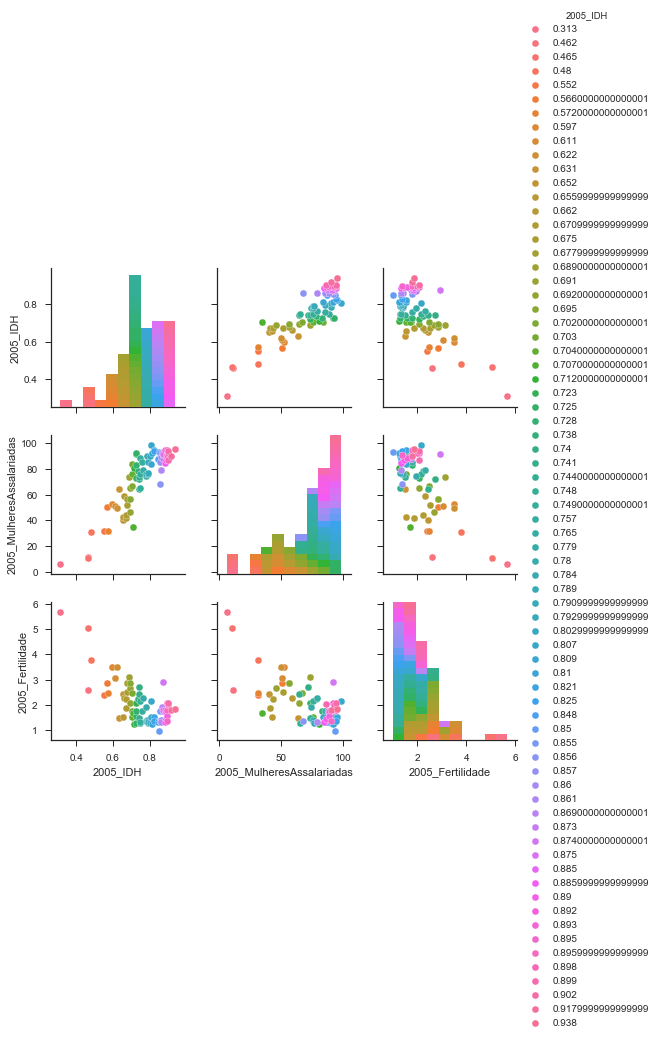

In [125]:
#Analisando as correlações dos dados
sns.set(style="ticks")
sns.pairplot(DatFra,hue="2005_IDH")#, hue="origin")#, x_vars=x_vars, y_vars=y_vars)

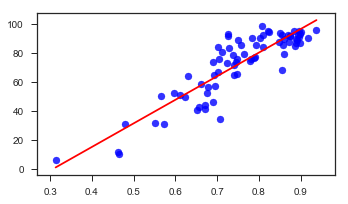

0.8855024383980613

In [126]:
#Agora, vamos analisar os gráficos de maineira mais aprofundada, com uma linha de tendência.
def reta(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
    
    fig = plt.figure(figsize=(5, 3))
    plt.scatter(dados_x, dados_y, c='blue', alpha=0.8)
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='red')
 
    plt.tight_layout()
    plt.show()

    
    
reta(DatFra['2005_IDH'], DatFra['2005_MulheresAssalariadas'])
DatFra['2005_IDH'].corr(DatFra['2005_MulheresAssalariadas'])


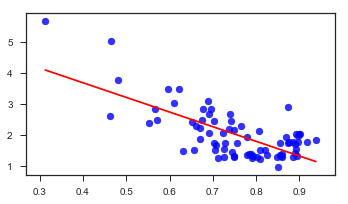

-0.7042457960574932

In [127]:
reta(DatFra['2005_IDH'], DatFra['2005_Fertilidade'])
DatFra['2005_IDH'].corr(DatFra['2005_Fertilidade'])

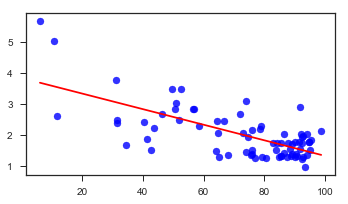

-0.6861977115163264

In [128]:
reta(DatFra['2005_MulheresAssalariadas'], DatFra['2005_Fertilidade'])
DatFra['2005_MulheresAssalariadas'].corr(DatFra['2005_Fertilidade'])

## Análise Parcial (2005):

Analisando os dados gráficamente, pode-se perceber que eles têm uma relação clara. No gráfico de "IDH" por "Mulheres Assalariadas", pode-se observar que, quanto maior o IDH, mais mulheres têm empregos assalariados. Além disso, ao analisar o gráfico de "IDH" por "Fertilidade" pode-se notar que são inversamente proporcionais, quanto maior o IDH do país, menos filhos as mulheres tendem a ter.

Os gráficos apontam que, um menor IDH no país pode influenciar a população a ter mais filhos, tanto pela escolaridade das pessoas (que leva a um desconhecimento sobre métodos contraceptivos), quanto pela possibilidade de mão de obra (quanto mais "braços" trabalhando, mais rápido os trabalhos são feitos, trazendo mais lucro). E, concequentemente, em países com o IDH mais alto os casais tem menos filhos, tanto pelo custo de se ter um, quanto pela opção de ter ou não ter.

Além da fertilidade, pode-se notar que o IDH influencia na quantidade de mulheres assalariadas.  O que também, pela análise do gráfico Mulheres assalariadas" por "Fertilidade", indica que as três coisas são relacionadas. Com um número maior de mulheres trabalhando, as pessoas tendem a ter menos filhos, pois não tem alguém para cuidar, só e exclusivamente, deles.

Para que esses dados se comprovem e possam ser mais confiáveis, uma comparação com mais anos deve ser feita.

In [129]:
Fert_2006 = Fertilidade_idx.loc[:,['Total fertility rate', 2006]]
IDH_2006 = IDH_idx.loc[:,['HDI', 2006]]
MA_2006 = MA_idx.loc[:,['Female salaried employees (%)', 2006]]

df4 = IDH_2006.join(MA_2006, how='inner', lsuffix='_IDH', rsuffix='_MulheresAssalariadas')
df5 = df4.join(Fert_2006, how = 'inner', rsuffix='Fertilidade')
df6 = pd.DataFrame()
df6['2006_IDH'] = df5['2006_IDH']
df6['2006_MulheresAssalariadas'] = df5['2006_MulheresAssalariadas']
df6['2006_Fertilidade'] = df5[2006]
df6 = df6.dropna()

C:\Users\thive\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.
C:\Users\thive\Anaconda3\lib\site-packages\pandas\core\indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\thive\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation h

In [130]:
Fert_2007 = Fertilidade_idx.loc[:,['Total fertility rate', 2007]]
IDH_2007 = IDH_idx.loc[:,['HDI', 2007]]
MA_2007 = MA_idx.loc[:,['Female salaried employees (%)', 2007]]

df7 = IDH_2007.join(MA_2007, how='inner', lsuffix='_IDH', rsuffix='_MulheresAssalariadas')
df8 = df7.join(Fert_2007, how = 'inner', rsuffix='Fertilidade')
df9 = pd.DataFrame()
df9['2007_IDH'] = df8['2007_IDH']
df9['2007_MulheresAssalariadas'] = df8['2007_MulheresAssalariadas']
df9['2007_Fertilidade'] = df8[2007]
df9 = df9.dropna()

C:\Users\thive\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.
C:\Users\thive\Anaconda3\lib\site-packages\pandas\core\indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\thive\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation h

In [131]:
df6.to_csv('DataFrame2.csv')
DatFra2 = pd.read_csv('DataFrame2.csv')

df9.to_csv('DataFrame2.csv')
DatFra3 = pd.read_csv('DataFrame2.csv')

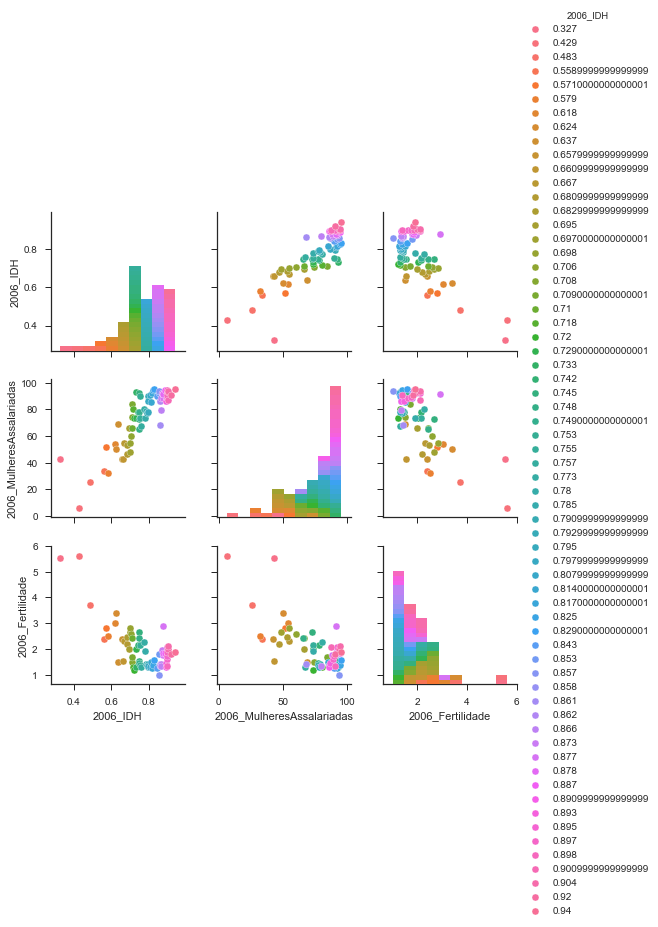

In [132]:
sns.set(style="ticks")
sns.pairplot(DatFra2,hue="2006_IDH")#, hue="origin")#, x_vars=x_vars, y_vars=y_vars)

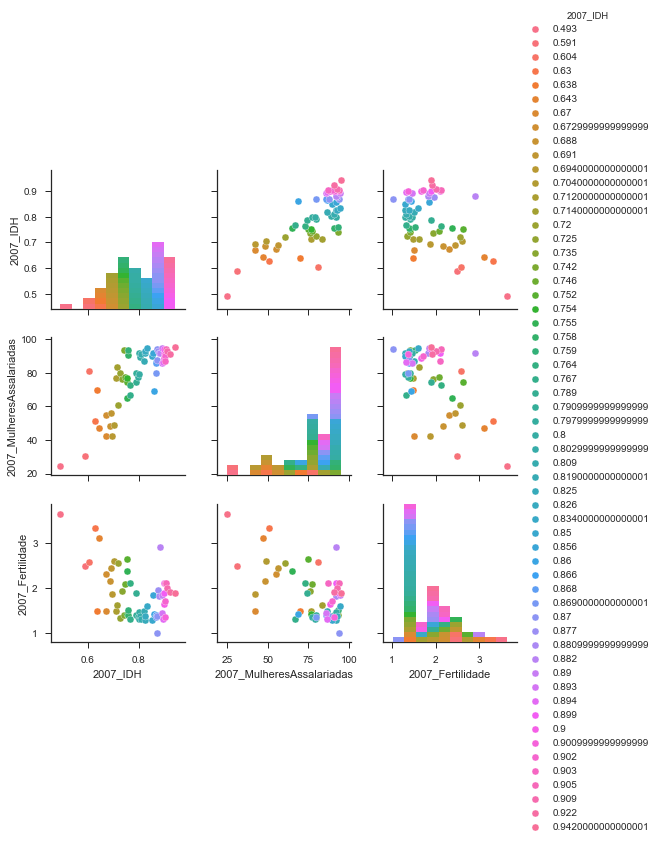

In [133]:
sns.set(style="ticks")
sns.pairplot(DatFra3,hue="2007_IDH")#, hue="origin")#, x_vars=x_vars, y_vars=y_vars)

#### Agora, que se tem os três anos prontos para serem analisados, basta compara-los para ver se o padrão se mantém ou não.

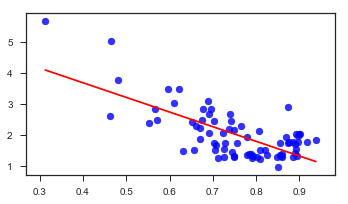

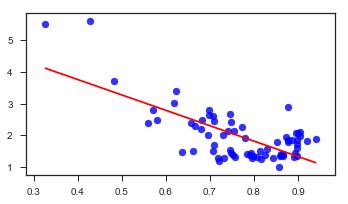

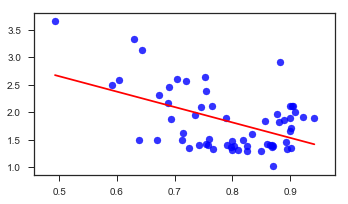

In [134]:
reta(DatFra['2005_IDH'], DatFra['2005_Fertilidade'])
reta(DatFra2['2006_IDH'], DatFra2['2006_Fertilidade'])
reta(DatFra3['2007_IDH'], DatFra3['2007_Fertilidade'])

In [135]:
DatFra['2005_IDH'].corr(DatFra['2005_Fertilidade'])

-0.7042457960574932

In [136]:
DatFra2['2006_IDH'].corr(DatFra2['2006_Fertilidade'])

-0.703219726464117

In [137]:
DatFra3['2007_IDH'].corr(DatFra3['2007_Fertilidade'])

-0.49306344229497967

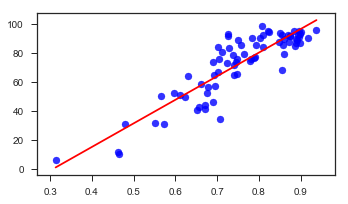

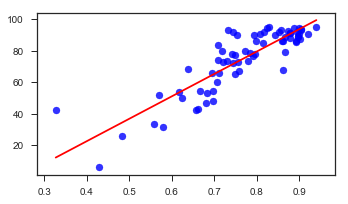

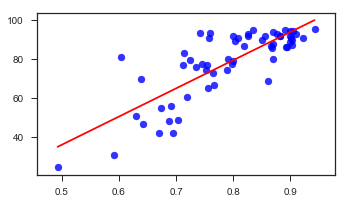

In [138]:
reta(DatFra['2005_IDH'], DatFra['2005_MulheresAssalariadas'])
reta(DatFra2['2006_IDH'], DatFra2['2006_MulheresAssalariadas'])
reta(DatFra3['2007_IDH'], DatFra3['2007_MulheresAssalariadas'])

In [139]:
DatFra['2005_IDH'].corr(DatFra['2005_MulheresAssalariadas'])

0.8855024383980613

In [140]:
DatFra2['2006_IDH'].corr(DatFra2['2006_MulheresAssalariadas'])

0.866116823353266

In [141]:
DatFra3['2007_IDH'].corr(DatFra3['2007_MulheresAssalariadas'])

0.8073309628672075

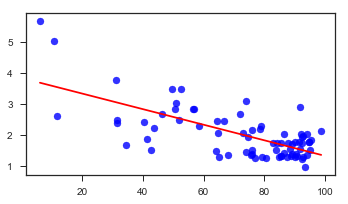

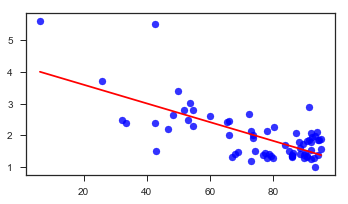

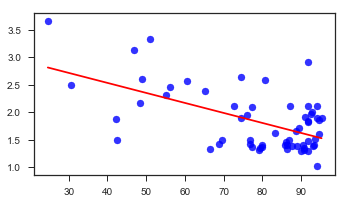

In [142]:
reta(DatFra['2005_MulheresAssalariadas'], DatFra['2005_Fertilidade'])
reta(DatFra2['2006_MulheresAssalariadas'], DatFra2['2006_Fertilidade'])
reta(DatFra3['2007_MulheresAssalariadas'], DatFra3['2007_Fertilidade'])

In [143]:
DatFra['2005_MulheresAssalariadas'].corr(DatFra['2005_Fertilidade'])

-0.6861977115163264

In [144]:
DatFra2['2006_MulheresAssalariadas'].corr(DatFra2['2006_Fertilidade'])

-0.7000903703703069

In [145]:
DatFra3['2007_MulheresAssalariadas'].corr(DatFra3['2007_Fertilidade'])

-0.5725771978396069

## Conclusão:

  Como havia-se observado, a relação, dos três gráficos, entre si são bem claras. Com a comparação entre os anos, pode-se ver que o padrão se mantém com certa precisão. Os números não deixam dúvida, em países com o IDH maior, as mulheres tendem a participar mais do mercado de trabalho e ter menos filhos, o que é entendível ao analisar-se o tempo disponível para cuidar de uma criança e dinheiro para sustenta-la.
  
O gráfico que contém a maior relação é o de IDH por mulheres assalariadas, com mais de 80 de taxa de correlação. Isso mostra que estão completamente relacionados, enquanto os outros gráficos ficam empatados nas casas do 60.

Com a análise dos dados é possível responder à pergunta inicial. Sim, os três dados estão conectados.